In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("XYZloan_default_selected_vars.csv")
data.tail()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI
79999,79999,80000,80000,1,25,1,3,12,2017/4/27 18:36,h5,...,9.0,9.0,129.0,129.0,167.0,167.0,167.0,167.0,7.0,WEB


In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

In [4]:
data.dtypes
print(data.dtypes)

In [5]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1','id'], axis=1)

In [6]:
APs = ['AP001', 'AP003', 'AP008']
CRs = ['CR009', 'CR015', 'CR019']
PAs = ['PA022', 'PA023', 'PA029']
TDs = ['TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
var = APs + CRs + PAs + TDs
target = ['loan_default']
data = data[var + target]
data

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
0,31,1,3,35807,4,2,-1.0,-1.0,-98.0,1,4,1,5,1,2,1
1,27,1,4,7254,6,11,-1.0,-1.0,-98.0,2,3,1,3,1,2,0
2,33,4,2,30377,2,3,-1.0,-1.0,-98.0,2,4,1,5,1,1,0
3,34,4,5,0,5,8,-1.0,-1.0,-98.0,0,0,0,0,0,1,0
4,47,1,4,0,6,11,-99.0,-99.0,-99.0,2,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,39,1,3,16716,5,6,-1.0,-1.0,-98.0,2,2,0,4,0,3,0
79996,31,4,4,3388,5,5,-1.0,-1.0,-98.0,0,2,0,2,0,0,0
79997,37,1,3,0,3,6,-1.0,-1.0,-98.0,1,1,2,1,2,2,0
79998,38,1,2,20200,4,5,-1.0,-1.0,-98.0,0,0,0,0,0,0,0


In [7]:
data.isnull().sum()

AP001             0
AP003             0
AP008             0
CR009             0
CR015             0
CR019             0
PA022           381
PA023           381
PA029           381
TD001             0
TD005             0
TD006             0
TD009             0
TD010             0
TD014             0
loan_default      0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    data, test_size=0.40, random_state=42)

In [9]:
data = data[data['PA022'].notnull()]
data = data[data['PA023'].notnull()]
data = data[data['PA029'].notnull()]
train['AP003'] = train['AP003'].astype('category',copy=False)
train['AP008'] = train['AP008'].astype('category',copy=False)
train['CR009_C'] = pd.cut(train['CR009'],5,duplicates='drop')
train['PA022_C'] = pd.cut(train['PA022'],5,duplicates='drop')
train['PA023_C'] = pd.cut(train['PA023'],5,duplicates='drop')
train['PA029_C'] = pd.cut(train['PA029'],5,duplicates='drop')

In [10]:
import category_encoders as ce
ec = ce.WOEEncoder()
train_woe= train[['loan_default','AP001','AP003', 'AP008','CR009_C', 'CR015', 'CR019','PA022_C', 'PA023_C', 'PA029_C','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']]
var_c = ('AP003', 'AP008','CR009_C','PA022_C', 'PA023_C', 'PA029_C')

In [11]:
for i in var_c:
    X = train_woe[i]
    y = train_woe['loan_default']
    x_WOE = ec.fit(X, y)
    x_cleaned = ec.transform(X).round(2)
    df_woe = pd.DataFrame()
    df_woe[i] = train_woe[i]
    df_woe[i+'_woe'] = x_cleaned
    df_woe = df_woe.drop_duplicates()
    train_woe = pd.merge(train_woe, df_woe, on = i, how = 'left')

In [12]:
var = pd.DataFrame(train.dtypes)
var.head(10)

,0
AP001,int64
AP003,category
AP008,category
CR009,int64
CR015,int64
CR019,int64
PA022,float64
PA023,float64
PA029,float64
TD001,int64


In [13]:
var = pd.DataFrame(train.dtypes).reset_index()
var.head()

,index,0
0,AP001,int64
1,AP003,category
2,AP008,category
3,CR009,int64
4,CR015,int64


In [14]:
var.columns = ['varname','dtype']
var.head(10)

,varname,dtype
0,AP001,int64
1,AP003,category
2,AP008,category
3,CR009,int64
4,CR015,int64
5,CR019,int64
6,PA022,float64
7,PA023,float64
8,PA029,float64
9,TD001,int64


In [15]:
var['source'] = var['varname'].str[:2]
var.head()

,varname,dtype,source
0,AP001,int64,AP
1,AP003,category,AP
2,AP008,category,AP
3,CR009,int64,CR
4,CR015,int64,CR


In [16]:
var['source'].value_counts()

TD    6
PA    6
CR    4
AP    3
lo    1
Name: source, dtype: int64

In [17]:
# "AP004" is a bad data field and should be removed.
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP004')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
AP_list

['AP001', 'AP003', 'AP008']

In [18]:
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

In [19]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 3 hours 49 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_emilyziyixiao_66fo6i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.279 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [20]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [21]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [22]:
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list
target='loan_default'

In [23]:
rf_v1 = H2ORandomForestEstimator(
    model_id = 'rf_v1',
    ntrees = 300,
    nfolds=10,
    min_rows=100,
    seed=1234)
rf_v1.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         100955                 5            10           7.21          19            25            21.9067

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.1480004201500166
RMSE: 0.3847082272970213
MAE: 0.2966686854758602
RMSLE: 0.26969095574394414
Mean Residual Deviance: 0.1480004201500166

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.14820249115684556
RMSE: 0.38497076662630575
MAE: 0.2971199592307889
RMSLE: 0.26991066181470647
Mean Residual Deviance: 0.14820249115684556

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.297016   0.0107195   0.291465      0.290162      0.301415      0.300775      0.294374      0.315054      0.285534      0.300952      0.280438      0.309992
mean_residual_deviance  0.148038   0.0121466   0.14151       0.142027      0.153517      0.153322      0.145178      0.168598      0.133315      0.150195      0.130033      0.16269
mse                     0.148038   0.0121466   0.14151       0.142027      0.153517      0.153322      0.145178      0.168598      0.133315      0.150195      0.130033      0.16269
r2                      0.0260803  0.0165599   0.00486601    0.0360175     0.0318778     0.0358655     0.056415      0.0212298     0.00764375    0.00600682    0.0361552     0.024725
residual_deviance       0.148038   0.0121466   0.14151       0.142027      0.153517      0.153322      0.145178      0.168598      0.133315      0.150195      0.130033      0.16269
rmse                    0.384467   0.0157613   0.376178      0.376865      0.391812      0.391564      0.381022      0.410607      0.365123      0.38755       0.360601      0.403349
rmsle                   0.269699   0.00840525  0.266491      0.264785      0.273254      0.272705      0.266408      0.283635      0.260637      0.272985      0.256293      0.279802

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2022-12-06 23:27:00  10.924 sec  0.0                nan                  nan                  nan
     2022-12-06 23:27:00  10.930 sec  1.0                0.39444778746451054  0.2990887360488392   0.15558905703564768
     2022-12-06 23:27:00  10.934 sec  2.0                0.39545643933583463  0.29993200470772424  0.15638579541217665
     2022-12-06 23:27:00  10.939 sec  3.0                0.391101688867678    0.2968900952316184   0.15296053103514998
     2022-12-06 23:27:00  10.943 sec  4.0                0.3901781511903285   0.29649116691886795  0.15223898966630284
     2022-12-06 23:27:00  10.947 sec  5.0                0.3898026424053141   0.296943922089797    0.15194610002616515
     2022-12-06 23:27:00  10.951 sec  6.0                0.3896651003524518   0.2978806865969685   0.1518388904326863
     2022-12-06 23:27:00  10.955 sec  7.0                0.3882590348990911   0.29688271451826503  0.15074507818077362
     2022-12-06 23:27:00  10.960 sec  8.0                0.38737383087007304  0.29601763984004215  0.15005848484295595
     2022-12-06 

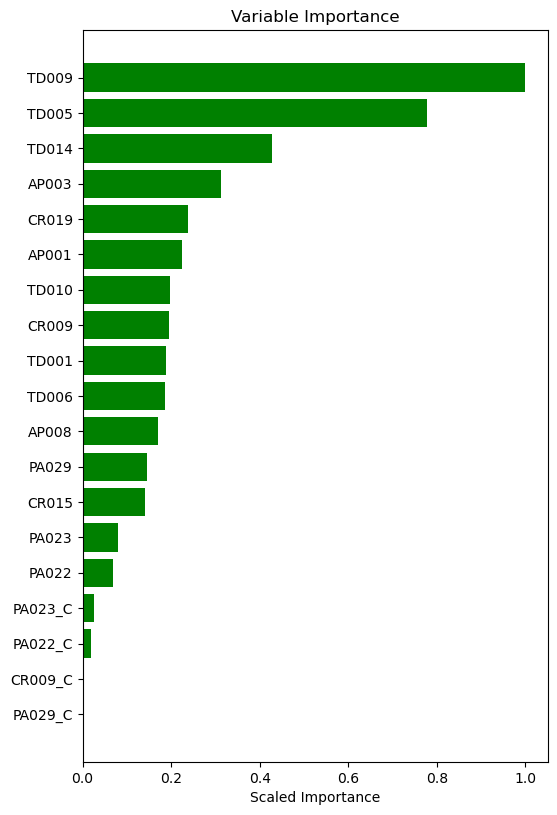

In [24]:
def VarImp(model_name):

    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()

VarImp(rf_v1)

In [25]:
predictions = rf_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict
0,0,0.277388
1,0,0.161412
2,0,0.132443
3,0,0.131183
4,0,0.107043


In [26]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(rf_v1)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,95,225,320,95,225,0.16,0.09,60.0,1.58,7.0,29.69
1,320,96,224,640,191,449,0.32,0.17,120.0,1.59,15.0,29.84
2,320,74,246,960,265,695,0.44,0.27,180.0,1.47,17.0,27.60
3,320,73,247,1280,338,942,0.56,0.36,240.0,1.41,20.0,26.41
4,320,65,255,1600,403,1197,0.67,0.46,300.0,1.34,21.0,25.19
5,320,50,270,1920,453,1467,0.76,0.56,360.0,1.26,20.0,23.59
6,320,45,275,2240,498,1742,0.83,0.67,420.0,1.19,16.0,22.23
7,320,36,284,2560,534,2026,0.89,0.78,480.0,1.11,11.0,20.86
8,320,32,288,2880,566,2314,0.94,0.89,540.0,1.05,5.0,19.65


In [27]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)

    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')

    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



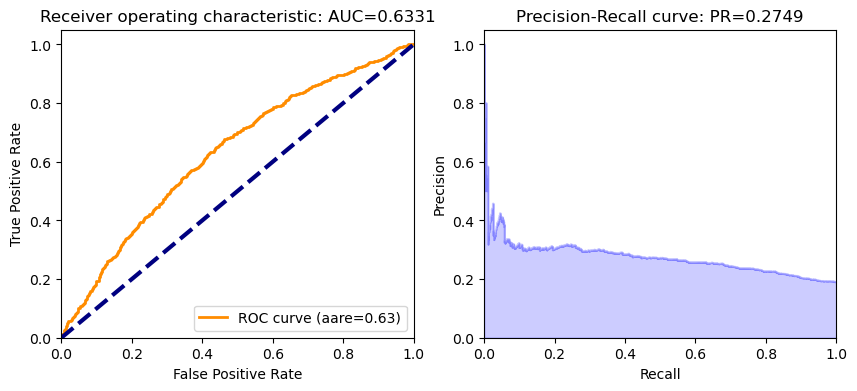

In [28]:
ROC_AUC(rf_v1,test_hex,'loan_default')

In [29]:
predictions = rf_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict
0,0,0.277388
1,0,0.161412
2,0,0.132443
3,0,0.131183
4,0,0.107043


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



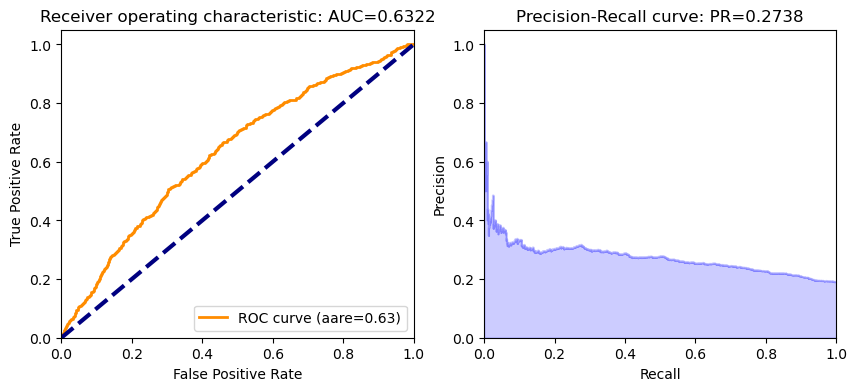

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



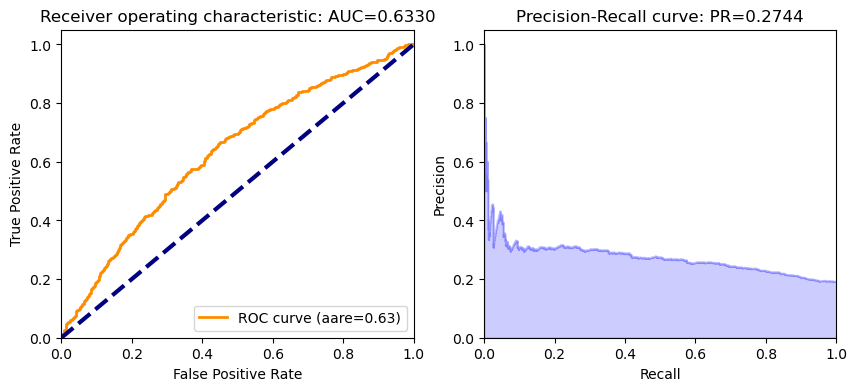

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



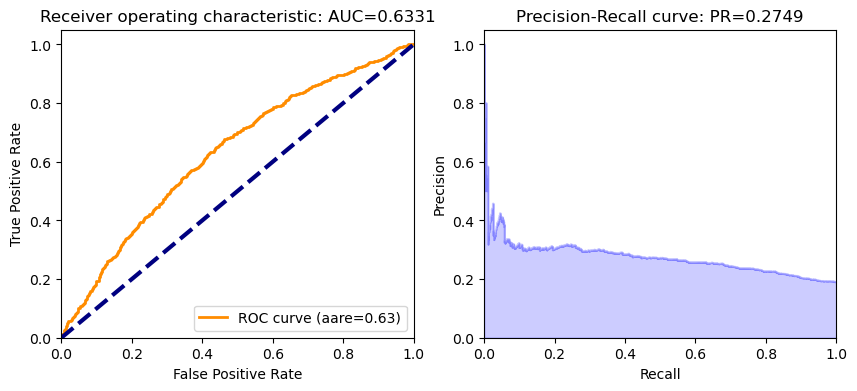

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



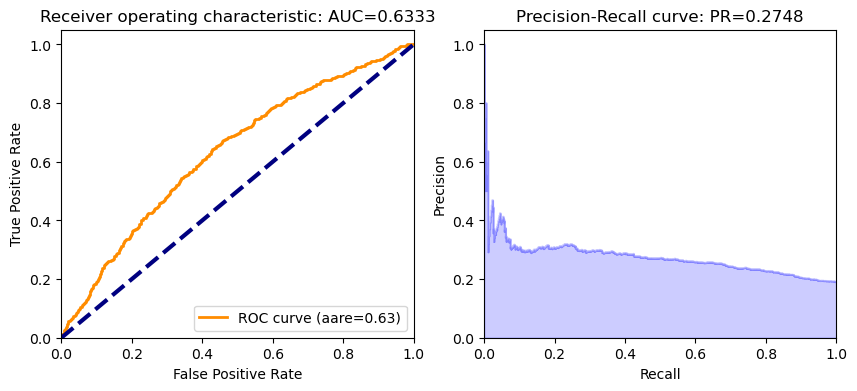

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



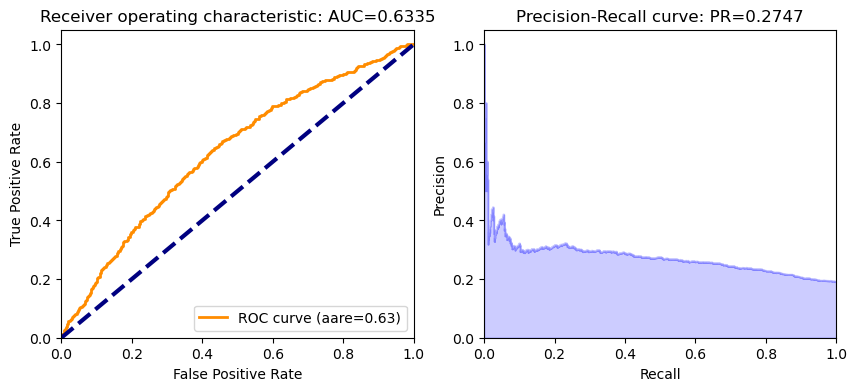

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



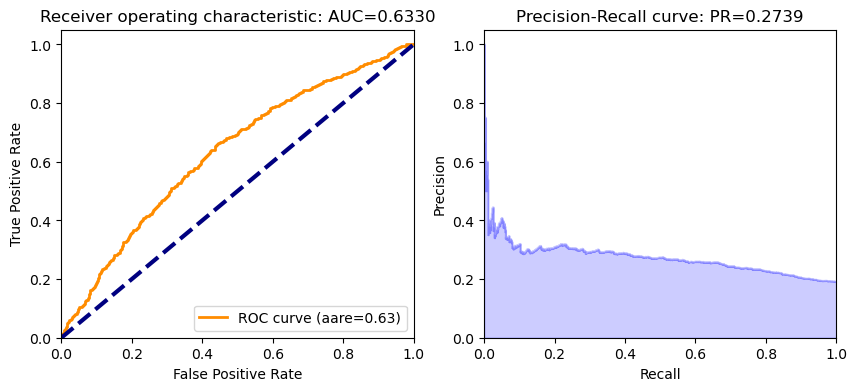

In [30]:
# build multiple models using a loop
i = 1
models = []
for k in (100,200,300,400,500,600):
    i = i+1
    model_id = 'rf_v'+ str(i)
    model = H2ORandomForestEstimator(
        model_id = model_id,
        ntrees = k,
        nfolds=10,
        min_rows = 100,
        seed=1234)
    model.train(predictors,target,training_frame=train_hex)
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
    createGains(model)
    ROC_AUC(model,test_hex,'loan_default')

In [31]:
!pip install imblearn

In [32]:
y = data[target]
X = data.drop(target,axis=1)
y.dtypes

dtype('int64')

In [33]:
y1_cnt = train[target].sum()
y1_cnt

9264

In [34]:
N = 2
y0_cnt = y1_cnt * N
y0_cnt

18528

In [35]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X, y,
                            sampling_strategy={1:y1_cnt , 0:  y0_cnt},
                            random_state=0)
X_rs = pd.DataFrame(X_rs)
y_rs = pd.DataFrame(y_rs)

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/metaestimators.py)

In [36]:
y_rs = data[data[target]==1]
X_rs = data[data[target]==0].sample(n=y0_cnt)
smpl = pd.concat([X_rs,y_rs])
smpl_hex = h2o.H2OFrame(smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [37]:
rf_v4 = H2ORandomForestEstimator(
    model_id = 'rf_v4',
    ntrees = 500,
    nfolds=10,
    min_rows=100,
    seed=1234)
rf_v4.train(predictors,target,training_frame=smpl_hex)

H2OValueError: Column CR009_C not in the training frame

In [ ]:
ROC_AUC(rf_v4,test_hex,'loan_default')

In [ ]:
createGains(rf_v4)

In [ ]:
y0_cnt = len(data)-data[target].sum()
y0_cnt
N = 0.5
y1_cnt = int(y0_cnt * N)
y1_cnt

In [ ]:
# With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples.
# Originally, there is 64512 samples and 30976 samples are asked.

y0_cnt = len(data)-data[target].sum()

from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(sampling_strategy={1:y1_cnt , 0:  y0_cnt})
X_rs, y_rs = sampler.fit_resample(X, y)
smpl = pd.concat([X_rs,y_rs],axis=1)
smpl_hex = h2o.H2OFrame(smpl)

In [ ]:
rf_v5 = H2ORandomForestEstimator(
    model_id = 'rf_v13',
    ntrees = 500,
    nfolds=10,
    min_rows=100,
    seed=1234)
rf_v5.train(predictors,target,training_frame=smpl_hex)

In [ ]:
ROC_AUC(rf_v5,test_hex,'loan_default')